In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
email = pd.read_excel("/content/Email Analysis Dataset.xlsx")

In [ ]:
email.head(3)

,Email id,From Name,From seniority,From Department,To Name,To seniority,To Department,Email topic,Date,Sentiment,Is opened?,Device,Within work hours,Within workdays
0,1,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,Operational Issues,2024-03-14,neutral,opened,desktop,yes,yes
1,2,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,HR related topics,2024-03-22,positive,opened,mobile,no,yes
2,3,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,Meeting Scheduling,2024-03-26,neutral,unopened,desktop,yes,yes


In [ ]:
email.columns

Index(['Email id', 'From Name', 'From seniority', 'From Department', 'To Name',
       'To seniority', 'To Department', 'Email topic', 'Date', 'Sentiment',
       'Is opened?', 'Device', 'Within work hours', 'Within workdays'],
      dtype='object')

#EDA

In [ ]:
email.shape

(1132, 14)

In [ ]:
email.isnull().sum()

Email id             0
From Name            0
From seniority       0
From Department      0
To Name              0
To seniority         0
To Department        0
Email topic          0
Date                 0
Sentiment            0
Is opened?           0
Device               0
Within work hours    0
Within workdays      0
dtype: int64

In [ ]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Email id           1132 non-null   int64         
 1   From Name          1132 non-null   object        
 2   From seniority     1132 non-null   object        
 3   From Department    1132 non-null   object        
 4   To Name            1132 non-null   object        
 5   To seniority       1132 non-null   object        
 6   To Department      1132 non-null   object        
 7   Email topic        1132 non-null   object        
 8   Date               1132 non-null   datetime64[ns]
 9   Sentiment          1132 non-null   object        
 10  Is opened?         1132 non-null   object        
 11  Device             1132 non-null   object        
 12  Within work hours  1132 non-null   object        
 13  Within workdays    1132 non-null   object        
dtypes: datet

In [ ]:
email.describe()

,Email id,Date
count,1132.000000,1132
mean,624.666961,2024-03-16 11:07:50.671378176
min,1.000000,2024-03-01 00:00:00
25%,348.750000,2024-03-11 00:00:00
50%,631.500000,2024-03-15 00:00:00
75%,914.250000,2024-03-25 00:00:00
max,1197.000000,2024-03-31 00:00:00
std,337.942989,NaN


In [ ]:
email['Within work hours'].value_counts()

Within work hours
yes    912
no     220
Name: count, dtype: int64

In [ ]:
email['To Department'].value_counts()

To Department
Product development            205
Marketing                      164
Sales                          160
Information Technology (IT)    155
Legal                          136
Customer Service               116
Finance and Accounting          90
Human Resources                 58
Executive Management            48
Name: count, dtype: int64

In [ ]:
email['Date'].value_counts()

Date
2024-03-14    77
2024-03-13    70
2024-03-15    66
2024-03-12    66
2024-03-29    62
2024-03-07    61
2024-03-26    53
2024-03-27    53
2024-03-05    52
2024-03-28    51
2024-03-06    51
2024-03-25    49
2024-03-18    49
2024-03-11    49
2024-03-08    47
2024-03-20    46
2024-03-21    41
2024-03-22    39
2024-03-19    34
2024-03-04    27
2024-03-01    23
2024-03-30    16
2024-03-23    11
2024-03-02     9
2024-03-31     9
2024-03-16     7
2024-03-24     7
2024-03-17     5
2024-03-03     2
Name: count, dtype: int64

In [ ]:
email['Email topic'].value_counts()

Email topic
Sales and Marketing                 131
Legal Matters                       128
Meeting Scheduling                  126
Operational Issues                  118
Project Updates                     114
Technical Support                   101
Product Development                  94
Internal Policies and Procedures     67
Client Related Communication         63
HR related topics                    58
Finance and Accounting               46
Training and Development             40
Vendor Relations                     28
Security Alerts                      18
Name: count, dtype: int64

In [ ]:
email['Month'] = pd.DatetimeIndex(email['Date']).month

In [ ]:
email['Year'] = email['Date'].dt.year

In [ ]:
 email['Day of Week'] = email['Date'].dt.dayofweek

In [ ]:
#to convert the day of the week in numbers to words
email['Day of Week'] = email['Date'].dt.day_name()

In [ ]:
email.head(3)

,Email id,From Name,From seniority,From Department,To Name,To seniority,To Department,Email topic,Date,Sentiment,Is opened?,Device,Within work hours,Within workdays,Day of Week
0,1,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,Operational Issues,2024-03-14,neutral,opened,desktop,yes,yes,Thursday
1,2,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,HR related topics,2024-03-22,positive,opened,mobile,no,yes,Friday
2,3,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,Meeting Scheduling,2024-03-26,neutral,unopened,desktop,yes,yes,Tuesday


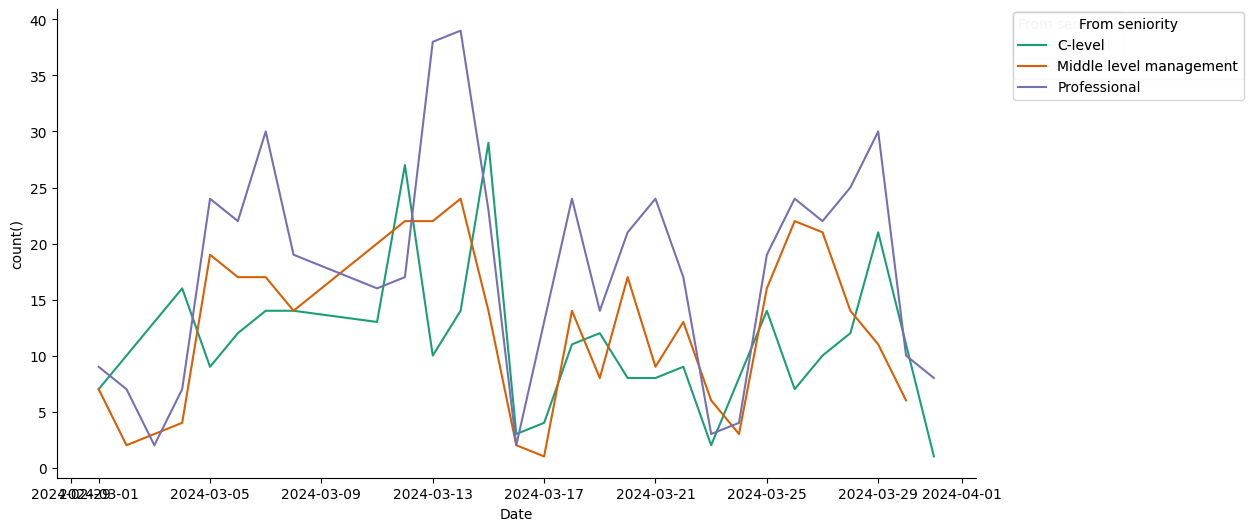

In [ ]:
# title Date vs count()
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = email.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('From seniority')):
  _plot_series(series, series_name, i)
  fig.legend(title='From seniority', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

# The chart above shows variability in the counts for different seniority levels over the month of March 2024, with notable peaks and troughs at different times. Professional seniority seems to have higher peaks compared to C-level and Middle level management, especially mid to late March. All categories show a decline towards the end of the month.

Text(0.5, 1.0, 'Email From seniority')

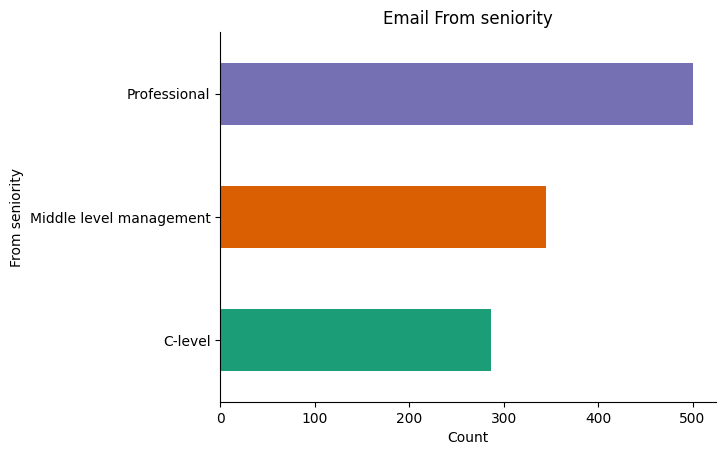

In [ ]:
# @title From seniority

from matplotlib import pyplot as plt
import seaborn as sns
email.groupby('From seniority').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Count')
plt.ylabel('From seniority')
plt.title('Email From seniority')


The chart above shows the counts for different seniority levels over the month of March 2024. Professional seniority seems to have the highest count compared to C-level and Middle level management.

Text(0.5, 1.0, 'Email To seniority')

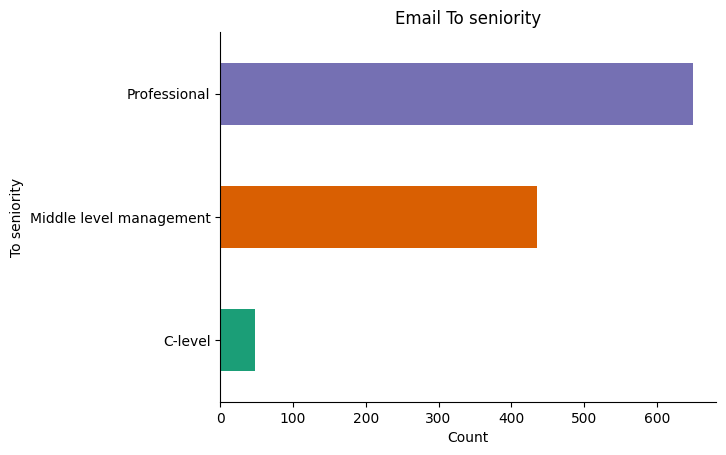

In [ ]:
# @title To seniority

#from matplotlib import pyplot as plt
#import seaborn as sns
email.groupby('To seniority').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Count')
plt.ylabel('To seniority')
plt.title('Email To seniority')

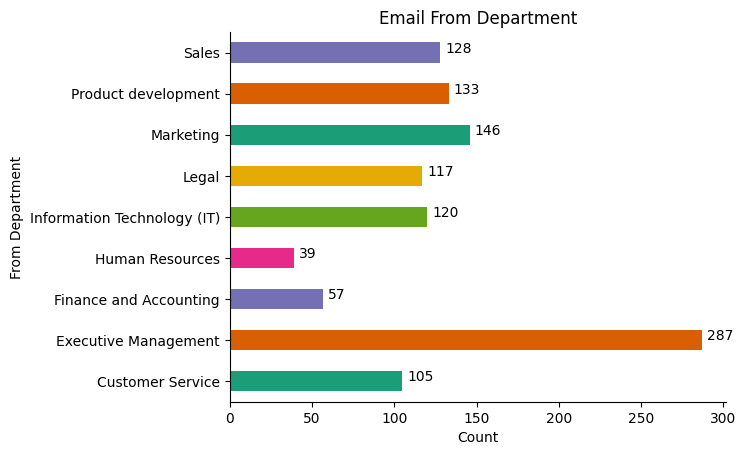

In [ ]:
#from department
email.groupby('From Department').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add data labels
for i, v in enumerate(email.groupby('From Department').size()):
    plt.text(v + 3, i, str(v), color='black')
    plt.xlabel('Count')
    plt.ylabel('From Department')
    plt.title('Email From Department')

The above chart indicates that Executive Management have the highest count of emails with 287 emails being mailed to other people or/department for the month of March, 2023.


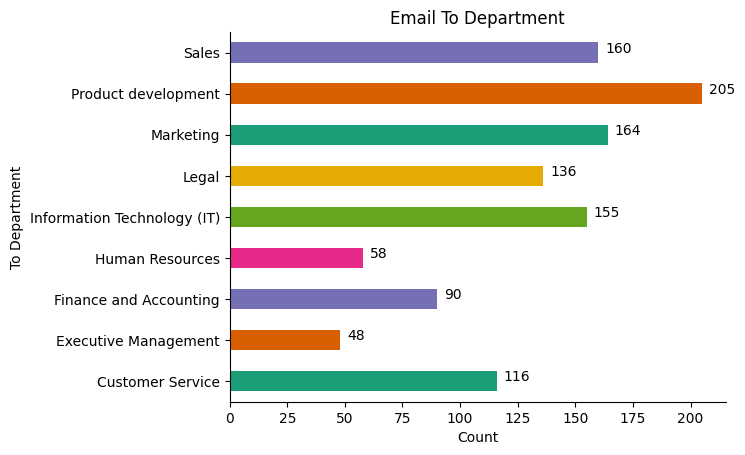

In [ ]:
#To department
email.groupby('To Department').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add data labels
for i, v in enumerate(email.groupby('To Department').size()):
    plt.text(v + 3, i, str(v), color='black')
    plt.xlabel('Count')
    plt.ylabel('To Department')
    plt.title('Email To Department')


The above chart indicates that Product development have the highest count of emails with 205 emails coming into their department for the month of March, 2023.

In [ ]:
email.head(2)

,Email id,From Name,From seniority,From Department,To Name,To seniority,To Department,Email topic,Date,Sentiment,Is opened?,Device,Within work hours,Within workdays,Month,Year,Day of Week
0,1,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,Operational Issues,2024-03-14,neutral,opened,desktop,yes,yes,3,2024,Thursday
1,2,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,HR related topics,2024-03-22,positive,opened,mobile,no,yes,3,2024,Friday


In [ ]:
email['Email topic'].value_counts()

Email topic
Sales and Marketing                 131
Legal Matters                       128
Meeting Scheduling                  126
Operational Issues                  118
Project Updates                     114
Technical Support                   101
Product Development                  94
Internal Policies and Procedures     67
Client Related Communication         63
HR related topics                    58
Finance and Accounting               46
Training and Development             40
Vendor Relations                     28
Security Alerts                      18
Name: count, dtype: int64

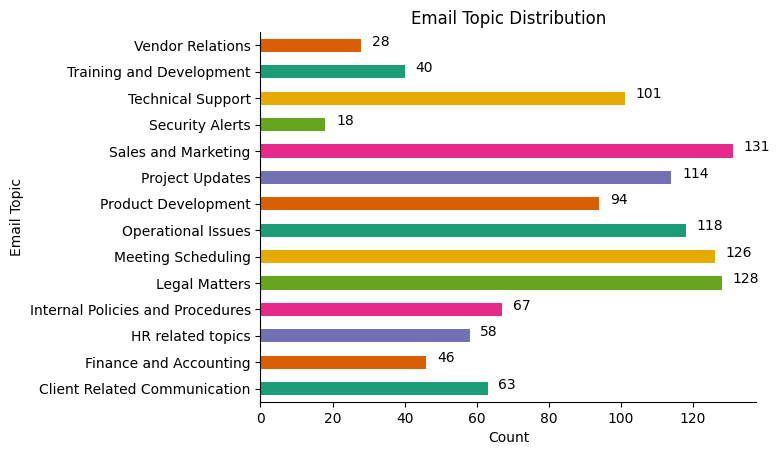

In [ ]:
#Email topic
email.groupby('Email topic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add data labels
for i, v in enumerate(email.groupby('Email topic').size()):
    plt.text(v + 3, i, str(v), color='black')
    plt.xlabel('Count')
    plt.ylabel('Email Topic')
    plt.title('Email Topic Distribution')



The top 3 Email topics are Sales and Marketing, Legal Matters and Meeting Scheduling with a count of 131,128 and 126 respectively.

In [ ]:
# Calculate the top 5 email topics
top_5_topics = email['Email topic'].value_counts().nlargest(5)

# Print the top 5 email topics
print(top_5_topics)

Email topic
Sales and Marketing    131
Legal Matters          128
Meeting Scheduling     126
Operational Issues     118
Project Updates        114
Name: count, dtype: int64


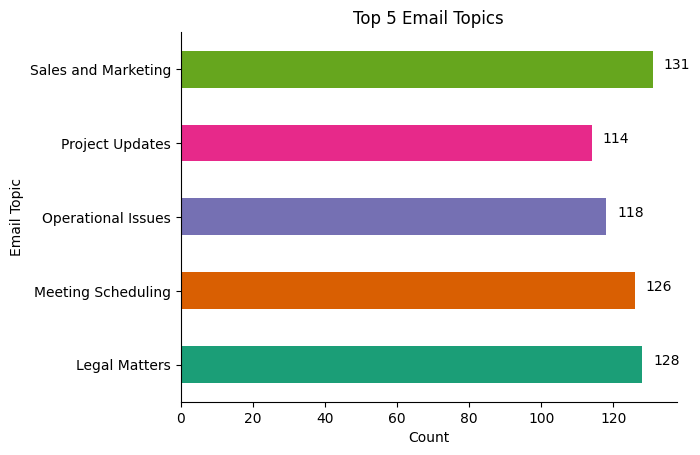

In [ ]:
# Calculate the top 5 email topics
top_5_topics = email['Email topic'].value_counts().nlargest(5).index.tolist()

# Filter the DataFrame for only the top 5 topics
top_5_email = email[email['Email topic'].isin(top_5_topics)]

# Plot the top 5 email topics
top_5_email.groupby('Email topic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Count')
plt.ylabel('Email Topic')
plt.title('Top 5 Email Topics')

# Add data labels
for i, v in enumerate(top_5_email.groupby('Email topic').size()):
    plt.text(v + 3, i, str(v), color='black')

In [ ]:
email['Day of Week'].value_counts()

Day of Week
Friday       237
Thursday     230
Wednesday    220
Tuesday      205
Monday       174
Saturday      43
Sunday        23
Name: count, dtype: int64

Text(0.5, 1.0, 'Day of Week')

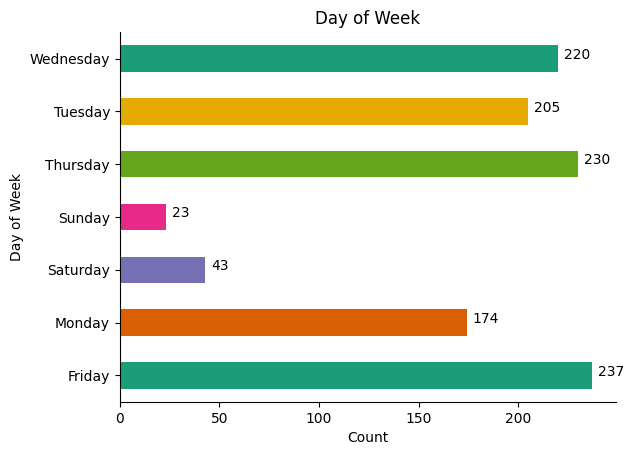

In [ ]:
email.groupby('Day of Week').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add data labels
for i, v in enumerate(email.groupby('Day of Week').size()):
    plt.text(v + 3, i, str(v), color='black')

plt.xlabel('Count')
plt.ylabel('Day of Week')
plt.title('Day of Week')





The above chart shows that the highest email count is 237 which falls on Friday, the last working day of the week.

In [ ]:
email.head(2)

,Email id,From Name,From seniority,From Department,To Name,To seniority,To Department,Email topic,Date,Sentiment,Is opened?,Device,Within work hours,Within workdays,Month,Year,Day of Week
0,1,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,Operational Issues,2024-03-14,neutral,opened,desktop,yes,yes,3,2024,Thursday
1,2,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,HR related topics,2024-03-22,positive,opened,mobile,no,yes,3,2024,Friday


In [ ]:
email['From seniority'].value_counts()

From seniority
Professional               500
Middle level management    345
C-level                    287
Name: count, dtype: int64

Text(0.5, 1.0, 'From seniority')

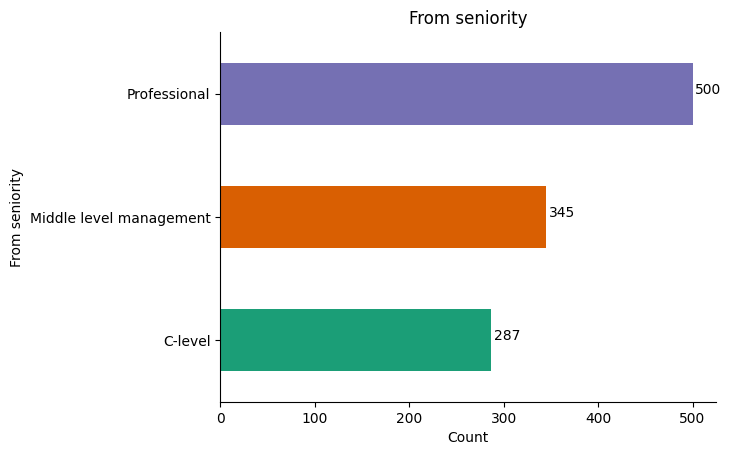

In [ ]:
email.groupby('From seniority').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add data labels
for i, v in enumerate(email.groupby('From seniority').size()):
    plt.text(v + 3, i, str(v), color='black')

plt.xlabel('Count')
plt.ylabel('From seniority')
plt.title('From seniority')



In [ ]:
email['To seniority'].value_counts()

To seniority
Professional               649
Middle level management    435
C-level                     48
Name: count, dtype: int64

Text(0.5, 1.0, 'To seniority')

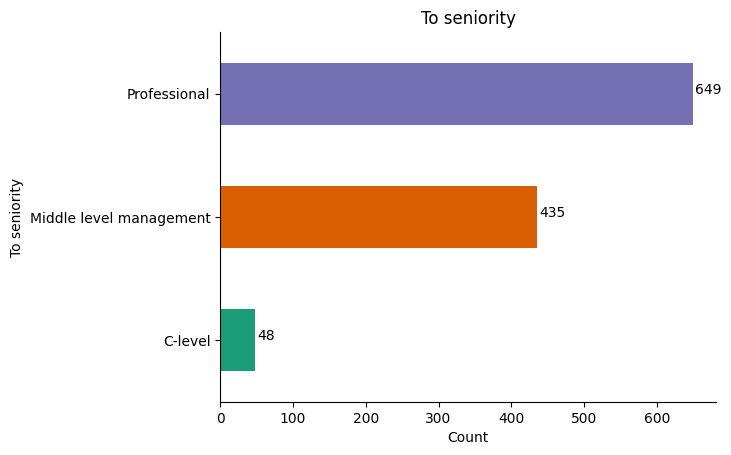

In [ ]:
email.groupby('To seniority').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add data labels
for i, v in enumerate(email.groupby('To seniority').size()):
    plt.text(v + 3, i, str(v), color='black')

plt.xlabel('Count')
plt.ylabel('To seniority')
plt.title('To seniority')


In [ ]:
email['Within work hours'].value_counts()

Within work hours
yes    912
no     220
Name: count, dtype: int64

Text(0.5, 1.0, 'Email sent Within work hours')

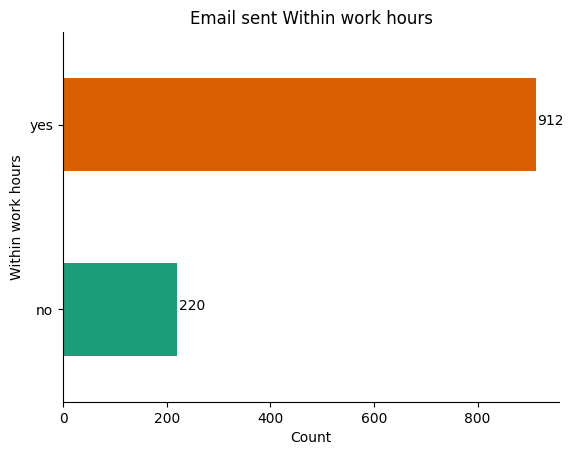

In [ ]:
email.groupby('Within work hours').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Add data labels
for i, v in enumerate(email.groupby('Within work hours').size()):
    plt.text(v + 3, i, str(v), color='black')

plt.xlabel('Count')
plt.ylabel('Within work hours')
plt.title('Email sent Within work hours')

The Chart above shows that more emails are sent within work hours.

In [ ]:
#email['Within work hours']= email['Within work hours'].replace({'Yes':1,'No':0})

In [ ]:
email['Is opened?'].value_counts()

Is opened?
opened      1034
unopened      98
Name: count, dtype: int64

In [ ]:
email['Sentiment'].value_counts()

Sentiment
neutral     660
positive    353
negative    119
Name: count, dtype: int64

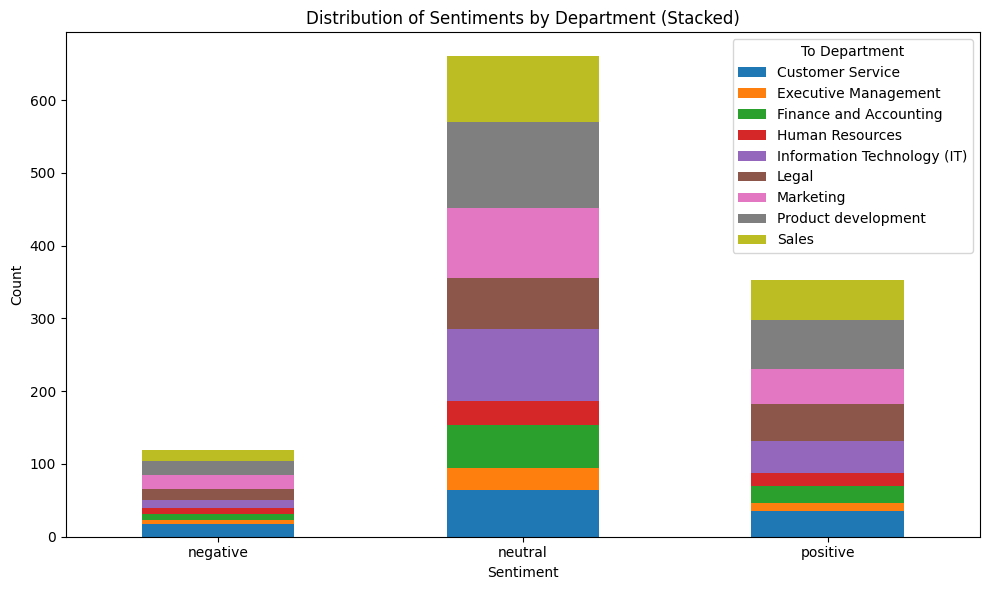

In [ ]:
# Group the data by 'Sentiment' and 'To Department', and count the occurrences
grouped_data = email.groupby(['Sentiment', 'To Department'])['Sentiment'].count().unstack()

# Create a stacked bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments by Department (Stacked)')
plt.xticks(rotation=0)
plt.legend(title='To Department')
plt.tight_layout()
plt.show()

The overall sentiment within the organization is skewed towards neutral. Positive sentiments are more prevalent than negative ones. Departments show varied levels of engagement and sentiment distribution. This stacked bar chart effectively shows the distribution and contributions of sentiments across departments, providing a clear visual representation of how different departments perceive or express sentiments in emails.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(email['Sentiment'], email['To Department'])

# Display the contingency table
print(contingency_table)

To Department  Customer Service  Executive Management  Finance and Accounting  \
Sentiment                                                                       
negative                     17                     6                       8   
neutral                      64                    31                      58   
positive                     35                    11                      24   

To Department  Human Resources  Information Technology (IT)  Legal  Marketing  \
Sentiment                                                                       
negative                     8                           11     15         20   
neutral                     33                           99     71         96   
positive                    17                           45     50         48   

To Department  Product development  Sales  
Sentiment                                  
negative                        19     15  
neutral                        118     90  
positive    

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(email['Sentiment'], email['From Department'])

# Display the contingency table
print(contingency_table)

From Department  Customer Service  Executive Management  \
Sentiment                                                 
negative                       16                    25   
neutral                        58                   176   
positive                       31                    86   

From Department  Finance and Accounting  Human Resources  \
Sentiment                                                  
negative                              2                6   
neutral                              34               23   
positive                             21               10   

From Department  Information Technology (IT)  Legal  Marketing  \
Sentiment                                                        
negative                                  11     11         18   
neutral                                   69     67         89   
positive                                  40     39         39   

From Department  Product development  Sales  
Sentiment                 

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(email['Sentiment'], email['Is opened?'])

# Display the contingency table
print(contingency_table)

Is opened?  opened  unopened
Sentiment                   
negative       109        10
neutral        595        65
positive       330        23


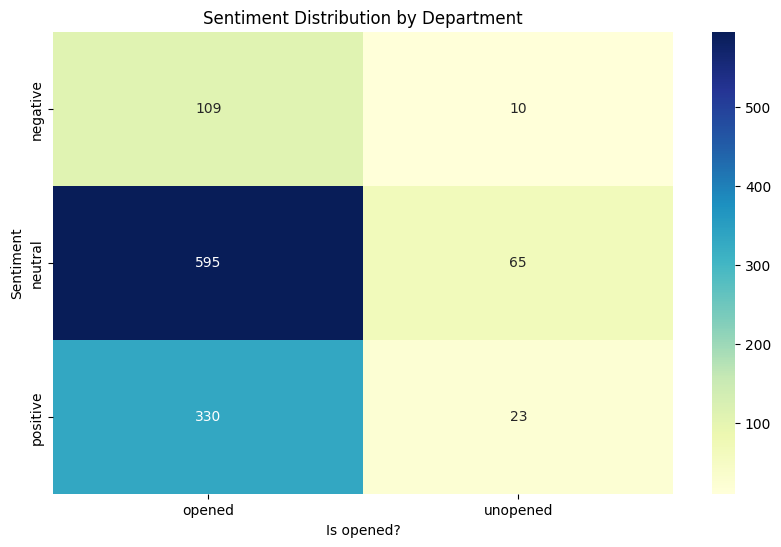

In [ ]:
# email correlation table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Is opened?')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution by Is opened?')
plt.show()

The heatmap shows that 330 emails are opened towards a positive sentiment, 595 towards a neutral sentiment and 109 towards a negative sentiment. While 23 is unopened with a positive sentiment, 65 was unopened with a neutral sentiment and 10 was also unopened with a negative sentiment.

From the heatmap, we can infer that:

The majority of emails have a neutral sentiment.
More emails were opened compared to unopened across all sentiment categories.
Neutral sentiment emails have the highest count, both for opened and unopened statuses.
This heatmap provides a clear visual representation of how email sentiments are distributed based on their open/unopened status, helping in analyzing patterns in email engagement and sentiment.

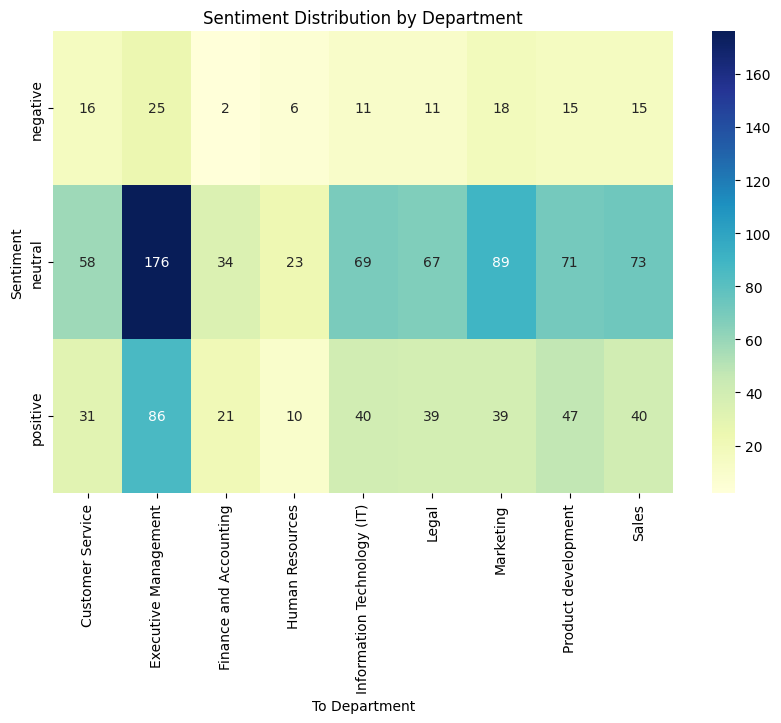

In [ ]:
# email correlation table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('To Department')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution by Department')
plt.show()

In [ ]:
#print(email.columns)
email.shape

(1132, 17)

In [ ]:
print(grouped_data.columns)

Index(['Day of Week', 'To seniority', 'Count'], dtype='object')


In [ ]:
# Define the desired order of days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert 'Day of Week' to an ordered categorical type
email['Day of Week'] = pd.Categorical(email['Day of Week'], categories=day_order, ordered=True)

# Sort the DataFrame by the ordered 'Day of Week' column
email = email.sort_values('Day of Week')

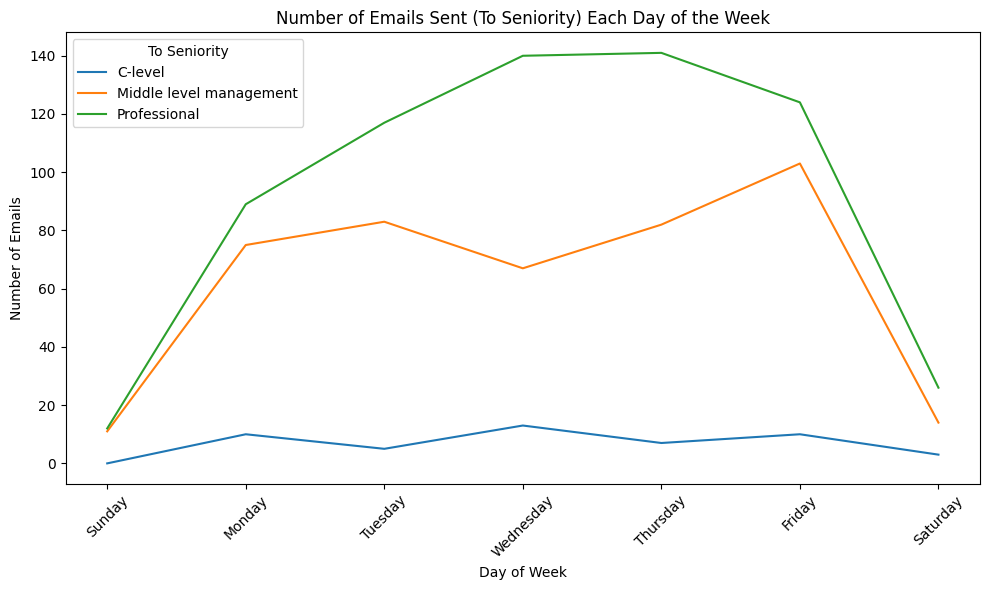

In [ ]:
# Group the data and count emails
grouped_data = email.groupby(['Day of Week', 'To seniority'])['Day of Week'].count().reset_index(name='Count')

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.lineplot(x='Day of Week', y='Count', hue='To seniority', data=grouped_data) # Changed 'To Seniority' to 'To seniority'
plt.xlabel('Day of Week')
plt.ylabel('Number of Emails')
plt.title('Number of Emails Sent (To Seniority) Each Day of the Week')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='To Seniority')
plt.tight_layout()
plt.show()

In [ ]:
email.head(2)

,Email id,From Name,From seniority,From Department,To Name,To seniority,To Department,Email topic,Date,Sentiment,Is opened?,Device,Within work hours,Within workdays
0,1,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,Operational Issues,2024-03-14,neutral,opened,desktop,yes,yes
1,2,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,HR related topics,2024-03-22,positive,opened,mobile,no,yes


In [ ]:
# Define the desired order of days
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Convert 'Day of Week' to an ordered categorical type
email['Month'] = pd.Categorical(email['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by the ordered 'Day of Week' column
email = email.sort_values('Month')


In [ ]:
email.head(2)

,Email id,From Name,From seniority,From Department,To Name,To seniority,To Department,Email topic,Date,Sentiment,Is opened?,Device,Within work hours,Within workdays,Month,Year,Day of Week
0,1,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,Operational Issues,2024-03-14,neutral,opened,desktop,yes,yes,NaN,2024,Thursday
1,2,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,HR related topics,2024-03-22,positive,opened,mobile,no,yes,NaN,2024,Friday


In [ ]:
email.columns

Index(['Email id', 'From Name', 'From seniority', 'From Department', 'To Name',
       'To seniority', 'To Department', 'Email topic', 'Date', 'Sentiment',
       'Is opened?', 'Device', 'Within work hours', 'Within workdays', 'Month',
       'Year', 'Day of Week'],
      dtype='object')

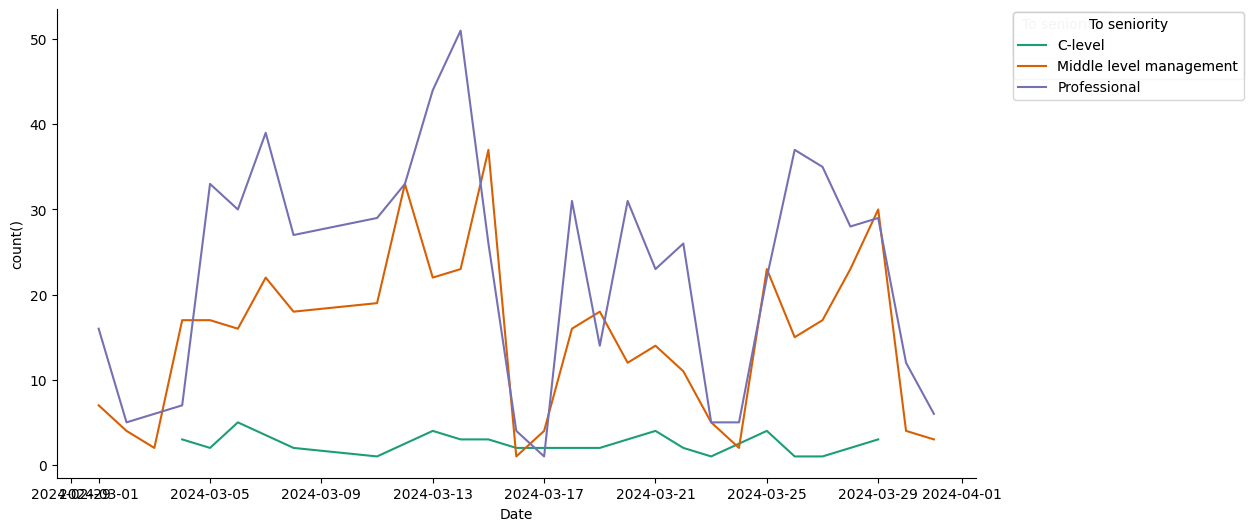

In [ ]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = email.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('To seniority')):
  _plot_series(series, series_name, i)
  fig.legend(title='To seniority', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

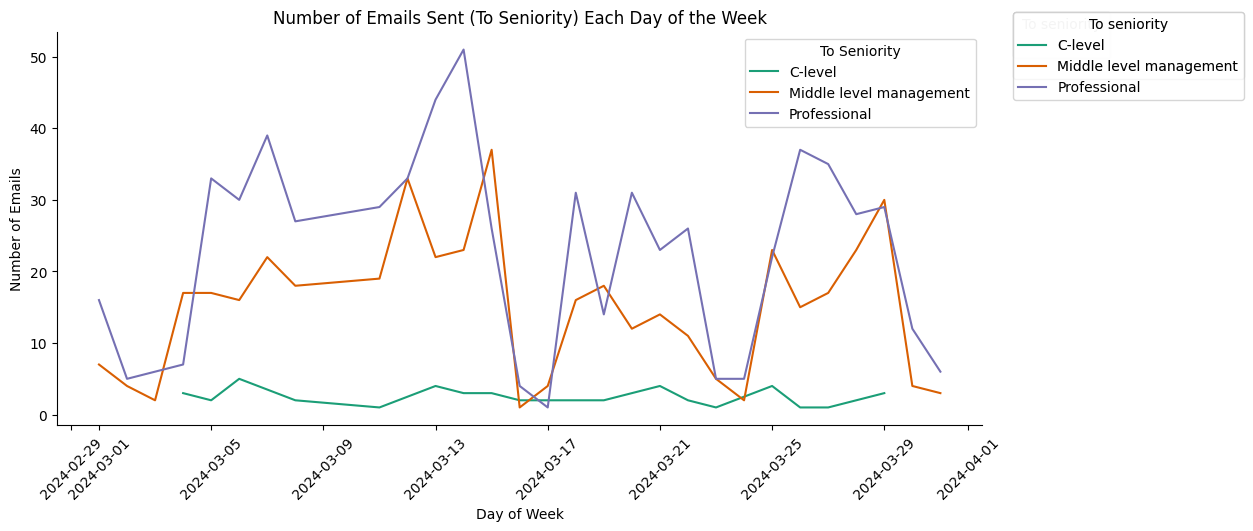

In [ ]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = email.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('To seniority')):
  _plot_series(series, series_name, i)
  fig.legend(title='To seniority', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
#plt.xlabel('Date')
_# = plt.ylabel('count()')

plt.xlabel('Day of Week')
plt.ylabel('Number of Emails')
plt.title('Number of Emails Sent (To Seniority) Each Day of the Week')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='To Seniority')
#plt.tight_layout()
plt.show()

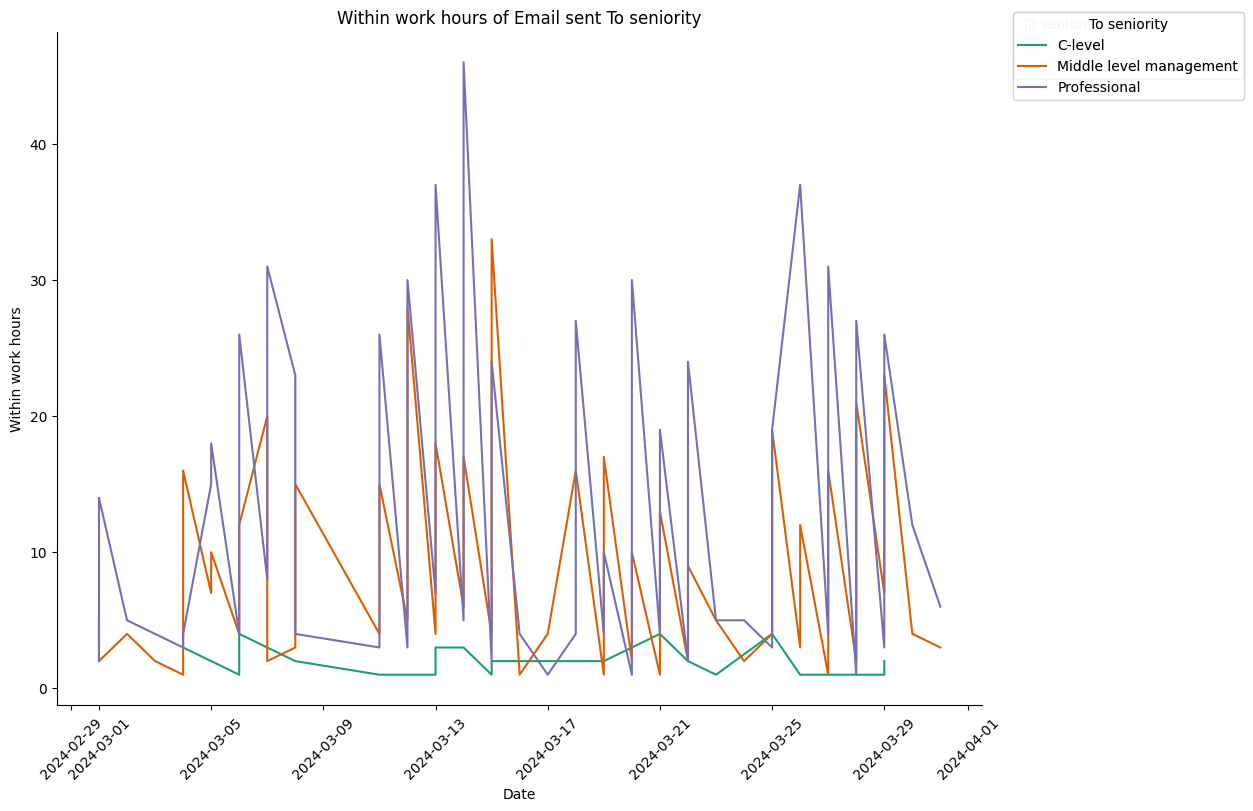

In [ ]:
# @title Date vs work within hours()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series.groupby(['Date', 'Within work hours'])
                .size()
                .reset_index(name='counts')
                .rename({'index': 'Date'}, axis=1)
                .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Example usage (assuming 'email' is your DataFrame)
fig, ax = plt.subplots(figsize=(10, 8), layout='constrained')
df_sorted = email.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('To seniority')):
  _plot_series(series, series_name, i)
  fig.legend(title='To seniority', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Within work hours')
plt.title('Within work hours of Email sent To seniority')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
#plt.tight_layout()
plt.show()

In [ ]:
email.head()

,Email id,From Name,From seniority,From Department,To Name,To seniority,To Department,Email topic,Date,Sentiment,Is opened?,Device,Within work hours,Within workdays,Month,Year,Day of Week
0,1,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,Operational Issues,2024-03-14,neutral,opened,desktop,yes,yes,3,2024,Thursday
1,2,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,HR related topics,2024-03-22,positive,opened,mobile,no,yes,3,2024,Friday
2,3,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,Meeting Scheduling,2024-03-26,neutral,unopened,desktop,yes,yes,3,2024,Tuesday
3,4,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,HR related topics,2024-03-11,neutral,opened,mobile,yes,yes,3,2024,Monday
4,5,Leona McAree,C-level,Executive Management,Elsinore Waterland,Middle level management,Human Resources,HR related topics,2024-03-11,positive,opened,mobile,yes,yes,3,2024,Monday


In [ ]:
email['Is opened?'].value_counts()

Is opened?
opened      1034
unopened      98
Name: count, dtype: int64

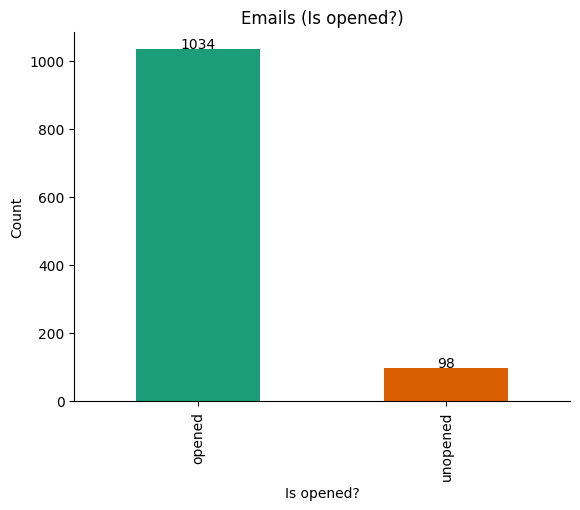

In [ ]:
email['Is opened?'].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

# Add data labels
for i, v in enumerate(email['Is opened?'].value_counts()):
    plt.text(i, v + 3, str(v), color='black', ha='center')

plt.xlabel('Is opened?')
plt.ylabel('Count')
plt.title('Emails (Is opened?/ unopened)')
plt.show()

In [ ]:
email['Within work hours'].value_counts()

Within work hours
yes    912
no     220
Name: count, dtype: int64

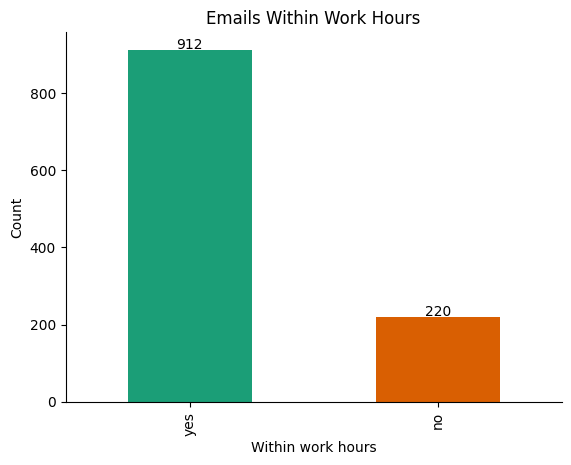

In [ ]:
email['Within work hours'].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

# Add data labels
for i, v in enumerate(email['Within work hours'].value_counts()):
    plt.text(i, v + 3, str(v), color='black', ha='center')

plt.xlabel('Within work hours')
plt.ylabel('Count')
plt.title('Emails Within Work Hours')
plt.show()

In [ ]:
email['Within workdays'].value_counts()

Within workdays
yes    1066
no       66
Name: count, dtype: int64

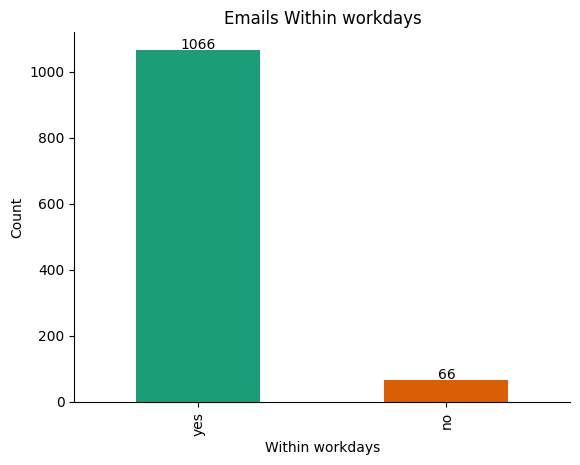

In [ ]:
email['Within workdays'].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

# Add data labels
for i, v in enumerate(email['Within workdays'].value_counts()):
    plt.text(i, v + 3, str(v), color='black', ha='center')

plt.xlabel('Within workdays')
plt.ylabel('Count')
plt.title('Emails Within workdays')
plt.show()